# MTH9875 Homework 1 

### ShengQuan Zhou

Assigned: August 30, 2018.
Due: September 13, 2018 by 6pm.

Late homework **will not be accepted**.

<font color = "red">Homework is to be done by each student individually.  To receive full credit, you must email a completed copy of this iPython notebook to Victor Istratov (stavka@gmail.com), Yassine Ghalem (yassine.ghalem@gmail.com) and Jim Gatheral (jim.gatheral@gmail.com) by the due date and time.  All R-code must run correctly and solutions must be written up neatly in Markdown/LaTeX format.

## Power laws

$$\newcommand{\bi}{\begin{itemize}}
\newcommand{\ei}{\end{itemize}}
\newcommand{\beq}{\begin{equation}}
\newcommand{\eeq}{\end{equation}}
\newcommand{\beas}{\begin{eqnarray*}}
\newcommand{\eeas}{\end{eqnarray*}}
\newcommand{\supp}{\mathrm{supp}}
\newcommand{\E}{\mathbb{E} }
\def\Cov{{ \mbox{Cov} }}
\def\Var{{ \mbox{Var} }}
\newcommand{\1}{\mathbf{1} }
\newcommand{\PP}{\mathbb{P} }
\newcommand{\QQ}{\mathbb{Q} }
\newcommand{\RR}{\mathbb{R} }
\newcommand{\DD}{\mathbb{D} }
\newcommand{\HH}{\mathbb{H} }
\newcommand{\spn}{\mathrm{span} }
\newcommand{\cov}{\mathrm{cov} }
\newcommand{\HS}{\mathcal{L}_{\mathrm{HS}} }
\newcommand{\trace}{\mathrm{trace} }
\newcommand{\LL}{\mathcal{L} }
\newcommand{\s}{\mathcal{S} }
\newcommand{\ee}{\mathcal{E} }
\newcommand{\ff}{\mathcal{F} }
\newcommand{\hh}{\mathcal{H} }
\newcommand{\bb}{\mathcal{B} }
\newcommand{\dd}{\mathcal{D} }
\newcommand{\g}{\mathcal{G} }
\newcommand{\half}{\frac{1}{2} }
\newcommand{\T}{\mathcal{T} }
$$
#### 1. (4 points)

Let $X_i$ be independent power-law distributed random variables, so that for large $x$,

$$
\Pr(X_i>x) \sim \frac{1}{x^{\zeta_{X_i}}} 
$$

 Prove the following properties of the tail exponents $\zeta_{X_i}$:

 (a) $$
\zeta_{X^\alpha}=\frac{\zeta_{X}}{\alpha}%\label{eq:PLpower}
$$

(b) $$
\zeta_{\alpha\,X}=\zeta_{X}
%\label{eq:PLprod}
$$



### Solution:

(a) For large $x>0$, the cumulative distribution function for $\zeta_{X^\alpha}$
$$\Pr(X^\alpha > x) = \Pr(X > x^{1/\alpha}) \sim \frac{1}{x^{\frac{\zeta_X}{\alpha}}}.$$
In other words,
$$
\zeta_{X^\alpha} = \frac{\zeta_X}{\alpha}.
$$

(b) Similarly, the cumulative distribution function for $\zeta_{\alpha X}$
$$
\Pr(\alpha X > x) = \Pr\left(X > \frac{x}{\alpha}\right)\sim \frac{1}{\left(\frac{x}{\alpha}\right)^{\zeta_X}} = \alpha^{\zeta_X}\cdot\frac{1}{x^{\zeta_X}}\sim \frac{1}{x^{\zeta_X}}.
$$
In other words,
$$
\zeta_{\alpha X} = \zeta_X.
$$


The following code snippet loads the data required for this homework assignment.

In [1]:
library(repr)
options(repr.plot.height=5)

In [2]:
download.file(url="http://mfe.baruch.cuny.edu/wp-content/uploads/2018/08/9875HW1.zip", destfile="9875HW1.zip")
unzip(zipfile="9875HW1.zip")

#### 2. (8 points)

(a) Convert the file `SSRN.csv` (which contains paper download numbers and ranks) to a data frame.

(b) Draw a log-log plot of number of paper downloads ($y$) vs download rank ($x$).

(c) Regress $y$ vs $x$ and superimpose the resulting fit on your plot from part (b).

(d) Write down the empirical power-law you have found in the form

$$
y = C x^\alpha.
$$

### Solution (a)

In [3]:
df1 = read.csv('SSRN.csv')
head(df1)

Rank,Author,Total.New.Downloads
1,"Fernandez, Pablo",139046
2,"Jensen, Michael C.",66341
3,"Jackson, Matthew O.",41335
4,"Faber, Mebane T.",37648
5,"Damodaran, Aswath",35219
6,"Harvey, Campbell R.",33425


### Solution (b) and (c)

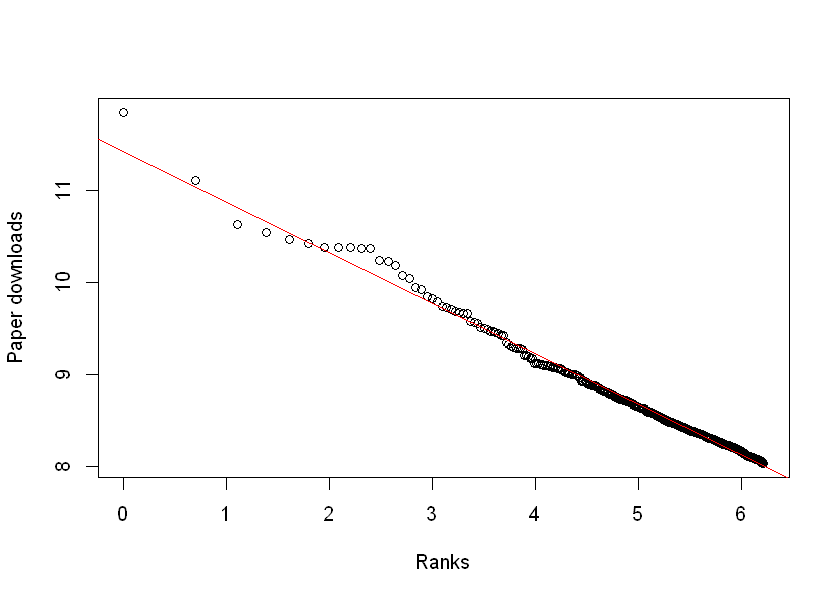

In [4]:
plot(log(df1$Rank), log(df1$Total.New.Downloads), ylab = "Paper downloads", xlab = "Ranks")
lm1 <- lm(log(df1$Total.New.Downloads) ~ log(df1$Rank)) 
abline(lm1, col = "red")

### Solution (d)

In [5]:
C1 = exp( lm1$coefficients[1] )
C1
alpha1 = lm1$coefficients[2]
alpha1

(Intercept) 
   90312.34

log(df1$Rank) 
    -0.546707

We found that $y \approx 90312\times x^{-0.5467}$.

#### 3. (8 points)

Repeat all four parts of question 2. for the dataset `Cities.csv`.

### Solution (a)

In [6]:
df2 = read.csv('Cities.csv')
head(df2)

Name,Population
New York City,8491079
Los Angeles,3928864
Chicago,2722389
Houston,2239558
Philadelphia,1560297
Phoenix,1537058


### Solution (b) and (c)

In [7]:
# add a rank column
df2$rank <-  rank(-df2$Population)
head(df2)

Name,Population,rank
New York City,8491079,1
Los Angeles,3928864,2
Chicago,2722389,3
Houston,2239558,4
Philadelphia,1560297,5
Phoenix,1537058,6


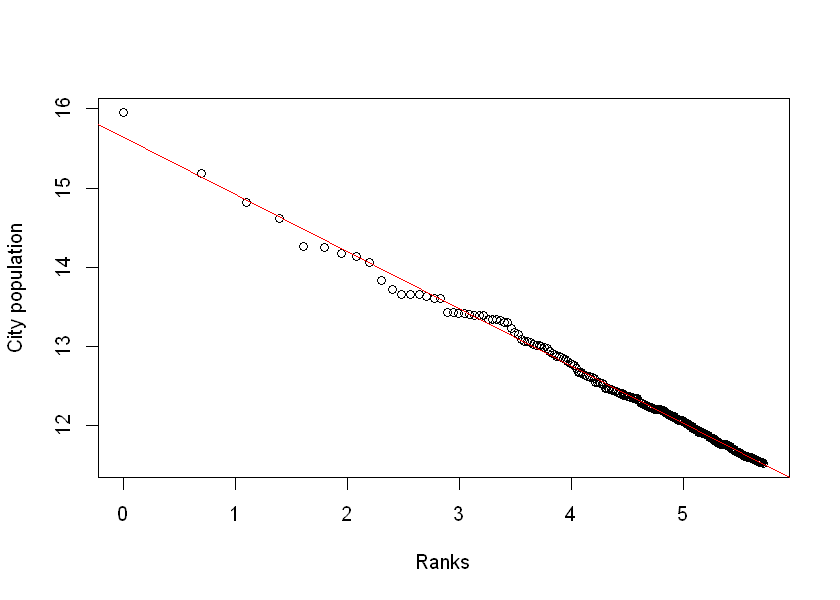

In [8]:
plot(log(df2$rank), log(df2$Population), ylab = "City population", xlab = "Ranks")
lm2 <- lm(log(df2$Population) ~ log(df2$rank)) 
abline(lm2, col = "red")

### Solution (d)

In [9]:
C2 = exp( lm2$coefficients[1] )
C2
alpha2 = lm2$coefficients[2]
alpha2

(Intercept) 
    6172140

log(df2$rank) 
   -0.7206535

We found that $y \approx 6172140\times x^{-0.7206}$.

#### 4. (12 points.)

(a) Assuming that SPX daily returns are Student-t distributed with $\nu=3$, mean $0$ and standard deviation of $1\%$,  what is the chance of a daily move of more than $10\%$?  Of more than $20\%$? How many years should we expect to wait to get moves of over $10\%$ and $20\%$ respectively? 

(b) Repeat the same computation assuming SPX daily returns are normally distributed.  Include in your answer all steps in your computation.

Recall that the SPX dropped $23\%$ on October 19, 1987.  
   
(c) Should this one-day move have been unexpected?  

(d) How many years would we expect to wait to get a move of this magnitude assuming SPX returns are normally distributed?  

(e) Compare your answer with the life of the universe so far (around 13.7 billion years).

### Solution (a)

A random variable $x$ obeying a student-t distribution with $\nu=3$ has standard deviation $\sigma=\sqrt{\frac{\nu}{\nu-2}}$. Thus, $y \triangleq 0.01\times \frac{x}{\sigma}$ obyes a student-t distribution with standard deviation $1%$. The cumulative probability
$$
\Pr(y>10\%) = \Pr\left(0.01\times \frac{x}{\sigma} > 0.1\right) = \Pr(x>10\sigma).
$$

The chance of a daily move of more than 10% is $\approx 4\times 10^{-4}$, for which we expect to wait 9.5 years to observe.

The chance of a daily move of more than 20% is $\approx 5\times 10^{-5}$, for which we expect to wait 75 years to observe.

In [10]:
# For student-t distribution, check
# http://astrostatistics.psu.edu/su07/R/html/stats/html/TDist.html
df = 3
sigma = sqrt(df / (df - 2))
p10 = 2 * (1 - pt(sigma * 10, df) )
cat("The chance of a daily move of more than 10%:", round(p10, digits=6), "\n")
p20 = 2 * (1 - pt(sigma * 20, df) )
cat("The chance of a daily move of more than 20%:", round(p20, digits=6))

The chance of a daily move of more than 10%: 0.000419 
The chance of a daily move of more than 20%: 5.3e-05

In [11]:
y10 = 1.0 / p10 / 252.0
cat("Number of years to expect a daily move of more than 10%:", round(y10, digits=2), "\n")
y20 = 1.0 / p20 / 252.0
cat("Number of years to expect a daily move of more than 20%:", round(y20, digits=2), "\n")

Number of years to expect a daily move of more than 10%: 9.46 
Number of years to expect a daily move of more than 20%: 75.02 


### Solution (b)

In [12]:
pn10 = 2 * pnorm(10, lower.tail = FALSE) 
cat("The chance of a daily move of more than 10%:", format(pn10, digits=2), "\n")
pn20 = 2 * pnorm(20, lower.tail = FALSE)
cat("The chance of a daily move of more than 20%:", format(pn20, digits=2))

The chance of a daily move of more than 10%: 1.5e-23 
The chance of a daily move of more than 20%: 5.5e-89

In [13]:
yn10 = 1.0 / pn10 / 252.0
cat("Number of years to expect a daily move of more than 10%:", format(yn10, digits=2), "\n")
yn20 = 1.0 / pn20 / 252.0
cat("Number of years to expect a daily move of more than 10%:", format(yn20, digits=2))

Number of years to expect a daily move of more than 10%: 2.6e+20 
Number of years to expect a daily move of more than 10%: 7.2e+85

### Answer (c)

Yes, this one-day move should have been unexpected.

### Solution (d)

In [14]:
pn23 = 2 * pnorm(23, lower.tail = FALSE)
yn23 = 1.0 / pn23 / 252.0
cat("Number of years to expect a daily move of more than 23%:", format(yn23, digits=2), "\n")

Number of years to expect a daily move of more than 23%: 8.5e+113 


### Solution (e)

the life of the universe so far (around 13.7 billion years) is far less than the estimate of waiting time from normal distribution ($\approx 8.5\times 10^{104}$ billion years).

## Stylized facts

#### 5.  (0 points)
Run my R-code in `9875Lecture1-2015.ipynb` and try to understand how it works.

### Solution:

Done.

#### 6. (6 points) 

The code snippet below loads the data file `spxVIX.rData`.  

(a) Write R-code to compute 
   - The average log-return conditional on the log-return being non-negative.
   - The average log-return conditional on the log-return being negative.

(b) What proportion of all moves are up-moves? Down-moves?  
   
(c) Relate your findings to one of the Rama Cont stylized facts.


In [15]:
library(quantmod)
load("spxVix.rData")

Loading required package: xts
Loading required package: zoo

Attaching package: 'zoo'

The following objects are masked from 'package:base':

    as.Date, as.Date.numeric

Loading required package: TTR
Version 0.4-0 included new data defaults. See ?getSymbols.


In [16]:
tail(spxVixData)

           Cl.GSPC Cl.VIX
2018-08-17 2850.13  12.64
2018-08-20 2857.05  12.49
2018-08-21 2862.96  12.86
2018-08-22 2861.82  12.25
2018-08-23 2856.98  12.41
2018-08-24 2874.69  11.99

### Solution (a)

In [17]:
vix <- spxVixData[,"Cl.VIX"]
spx <- spxVixData[,"Cl.GSPC"]

spx_ret <- log(spx/lag(spx))
spx_ret <- spx_ret[!is.na(spx_ret)]
mean_spx_ret_nonnegative = mean( spx_ret[spx_ret >= 0] )

vix_ret <- log(vix/lag(vix))
vix_ret <- vix_ret[!is.na(vix_ret)]
mean_vix_ret_nonnegative = mean( vix_ret[vix_ret >= 0] )

cat("The average log-return of SPX conditional on the log-return being non-negative:", round(mean_spx_ret_nonnegative, digits=4), "\n")
cat("The average log-return of VIX conditional on the log-return being non-negative:", round(mean_vix_ret_nonnegative, digits=4))

The average log-return of SPX conditional on the log-return being non-negative: 0.0072 
The average log-return of VIX conditional on the log-return being non-negative: 0.0486

In [18]:
mean_spx_ret_negative = mean( spx_ret[spx_ret < 0] )
mean_vix_ret_negative = mean( vix_ret[vix_ret < 0] )

cat("The average log-return of SPX conditional on the log-return being negative:", round(mean_spx_ret_negative, digits=4), "\n")
cat("The average log-return of VIX conditional on the log-return being negative:", round(mean_vix_ret_negative, digits=4))

The average log-return of SPX conditional on the log-return being negative: -0.0077 
The average log-return of VIX conditional on the log-return being negative: -0.0443

### Solution (b)

In [19]:
spx_up = length(spx_ret[spx_ret > 0])/length(spx_ret)
spx_dn = length(spx_ret[spx_ret < 0])/length(spx_ret)
vix_up = length(vix_ret[vix_ret > 0])/length(vix_ret)
vix_dn = length(vix_ret[vix_ret < 0])/length(vix_ret)

cat("Proportion of up   moves in SPX log-returns:", round(spx_up, digits=2), "\n")
cat("Proportion of down moves in SPX log-returns:", round(spx_dn, digits=2), "\n")
cat("Proportion of up   moves in VIX log-returns:", round(vix_up, digits=2), "\n")
cat("Proportion of down moves in VIX log-returns:", round(vix_dn, digits=2))

Proportion of up   moves in SPX log-returns: 0.53 
Proportion of down moves in SPX log-returns: 0.46 
Proportion of up   moves in VIX log-returns: 0.47 
Proportion of down moves in VIX log-returns: 0.52

### Answer (c)

Gain/loss asymmetry: one observes large drawdowns in stock prices and stock index values but not
equally large upward movements.

#### 7. (8 points) 

DAX is a German stock index analogous to the SPX index.  VDAX is the volatility index (VIX) of DAX.

(a) Using the lecture code as a template, use the quantmod package to download time series of DAX and VDAX.

(b) Regress VDAX log returns vs DAX log returns. What is the $R^2$ of this regression? What is the correlation? 

(c) Draw a scatter plot of VDAX log returns vs DAX log returns. Superimpose your linear fit from part (b) to make a diagram exactly like Figure 19 of Lecture 1.

**Note** Yahoo tickers for the DAX and VDAX are `"^GDAXI"` and `"^VDAX"` respectively.

### Solution (a)

In [20]:
# Load libraries
library(xts)
library(zoo)
library(quantmod)
library(boot)

In [21]:
#Get SPX and VIX data from Yahoo!
options("getSymbols.warning4.0"=FALSE)
getSymbols("^GDAXI",from="1927-01-01") 
getSymbols("^VDAX",from="1927-01-01")


Please see the Warning section of '?getSymbols.yahoo' for details.

This message is shown once per session and may be disabled by setting
options("getSymbols.yahoo.warning"=FALSE).
Warning message:
"^GDAXI contains missing values. Some functions will not work if objects contain missing values in the middle of the series. Consider using na.omit(), na.approx(), na.fill(), etc to remove or replace them."

[1] "GDAXI"

Warning message:
"^VDAX contains missing values. Some functions will not work if objects contain missing values in the middle of the series. Consider using na.omit(), na.approx(), na.fill(), etc to remove or replace them."

[1] "VDAX"

In [22]:
# Use specifyModel to align the two time series
mm <- specifyModel(Cl(GDAXI)~Cl(VDAX))
DaxVdaxData <- modelData(mm)
head(DaxVdaxData)

           Cl.GDAXI Cl.VDAX
2005-11-16  5081.46   14.65
2005-11-17  5099.72   14.54
2005-11-18  5123.50   14.35
2005-11-21  5170.61   13.56
2005-11-22  5174.72   13.69
2005-11-23  5196.08   13.11

### Solution (b)

In [23]:
dax <- DaxVdaxData[,"Cl.GDAXI"]
vdax <- DaxVdaxData[,"Cl.VDAX"]

dax_ret <- log(dax/lag(dax))
dax_ret <- dax_ret[!is.na(dax_ret)]
vdax_ret <- log(vdax/lag(vdax))
vdax_ret <- vdax_ret[!is.na(vdax_ret)]

lm3 = lm(vdax_ret ~ dax_ret)
r2 = summary(lm3)$r.squared
cat("R^2 of the regression:", round(r2, digits=4), "\n")
corr = cor(vdax_ret, dax_ret)
cat("Correlation of the regression:", round(corr, digits=4))

R^2 of the regression: 0.5148 
Correlation of the regression: -0.7175

### Solution (c)

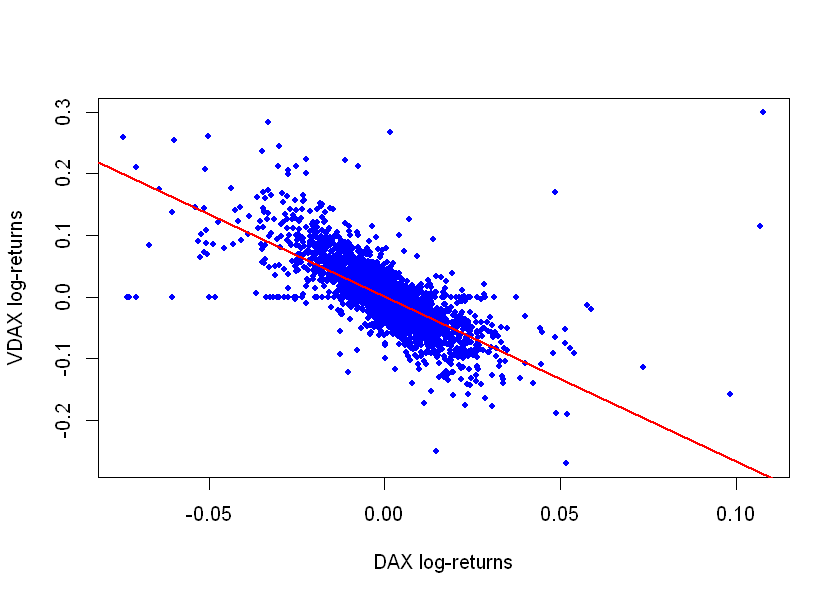

In [24]:
plot(as.numeric(dax_ret), as.numeric(vdax_ret), xlab = "DAX log-returns", ylab = "VDAX log-returns", pch=20, col="blue" )
abline(lm3, col = 'red', lwd=2)